In [1]:
print("Shivaya Namah")

Shivaya Namah


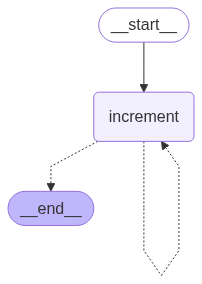

In [2]:
from langgraph.graph import StateGraph, END
from typing import TypedDict

class SimpleState(TypedDict):
    count: int

INCREMENT = "increment"

def increment_node(state: SimpleState) -> SimpleState : # Returns the same SimpleState object but with updated values.
    print(f"Current state's count {state['count']}")
    # Get the current state's count obbject and increment with one value. It automatically update the value.
    return {
        "count": state["count"] + 1
    } 

def should_continue(state: SimpleState) -> str:
    if state["count"] > 4:
        return END
    return INCREMENT

# Create a state graph.
graph_builder = StateGraph(SimpleState)
graph_builder.add_node(INCREMENT, increment_node)
graph_builder.set_entry_point(INCREMENT)

# Conditional Edge.
graph_builder.add_conditional_edges(
    INCREMENT,
    should_continue,
    path_map = {
        INCREMENT: INCREMENT,
        END: END
    } 
)

graph = graph_builder.compile()
graph

In [3]:
response = graph.invoke(SimpleState(count = 1))

Current state's count 1
Current state's count 2
Current state's count 3
Current state's count 4


In [4]:
response

{'count': 5}

In [5]:
type(response)

langgraph.pregel.io.AddableValuesDict

### Manual Transformation of State Values.

- Here we add more than one values in a state dictionary.

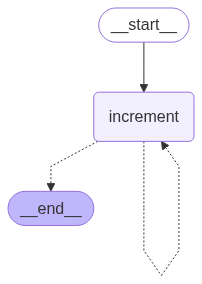

In [6]:
from langgraph.graph import StateGraph, END
from typing import TypedDict, List
from langgraph.pregel.io import AddableValuesDict

class SimpleStateWithMultipleVars(TypedDict):
    
    count: int
    sum: int
    count_history: List[int]

INCREMENT = "increment"

def increment_node(state: SimpleStateWithMultipleVars) -> SimpleStateWithMultipleVars : # Returns the same SimpleState object but with updated values.
    
    print(f"Current state's count {state["count"]}", end = "\n")
    print(f"Current state's sum {state["sum"]}", end = "\n")
    print(f"Current count_history {state["count_history"]}", end = "\n")
    # Get the current state's count obbject and increment with one value. It automatically update the value.
    
    new_count: int = state["count"] + 1
    return {
        "count": new_count,
        "sum": new_count + state["sum"],
        "count_history": state["count_history"] + [new_count]
    } 

def should_continue(state: SimpleStateWithMultipleVars) -> str:
    if state["count"] > 4:
        return END
    return INCREMENT

# Create a state graph.
graph_builder = StateGraph(SimpleStateWithMultipleVars)
graph_builder.add_node(INCREMENT, increment_node)
graph_builder.set_entry_point(INCREMENT)

# Conditional Edge.
graph_builder.add_conditional_edges(
    INCREMENT,
    should_continue,
    path_map = {
        INCREMENT: INCREMENT,
        END: END
    } 
)

graph = graph_builder.compile()
graph

In [7]:
response: AddableValuesDict = graph.invoke(
    SimpleStateWithMultipleVars(
        count = 0,
        sum = 0,
        count_history = []
    )
)

Current state's count 0
Current state's sum 0
Current count_history []
Current state's count 1
Current state's sum 1
Current count_history [1]
Current state's count 2
Current state's sum 3
Current count_history [1, 2]
Current state's count 3
Current state's sum 6
Current count_history [1, 2, 3]
Current state's count 4
Current state's sum 10
Current count_history [1, 2, 3, 4]


In [8]:
response

{'count': 5, 'sum': 15, 'count_history': [1, 2, 3, 4, 5]}

In [9]:
type(response)

langgraph.pregel.io.AddableValuesDict

#### Operator Module

The `operator` module in Python is a **built-in standard library** that provides **function equivalents of standard Python operators**.

---

## ✅ What is the `operator` module?

It offers a set of **efficient, readable, and functional-style** tools to perform operations like:

* Arithmetic: `+`, `-`, `*`, `/`
* Comparison: `==`, `>`, `<`, etc.
* Logical: `and`, `or`, `not`
* Item and attribute access: `obj.attr`, `dict[key]`

Each operator (e.g., `+`) has a **named function** in the `operator` module — e.g., `operator.add(a, b)` is equivalent to `a + b`.

---

## ✅ Common Use Cases

### 1. **Functional programming (with `map`, `reduce`, `sorted`, etc.)**

```python
from operator import add
from functools import reduce

nums = [1, 2, 3, 4]
total = reduce(add, nums)  # Same as sum(nums)
```

### 2. **Sorting with `itemgetter` or `attrgetter`**

```python
from operator import itemgetter

data = [
    {"name": "Alice", "score": 88},
    {"name": "Bob", "score": 72}
]

sorted_data = sorted(data, key=itemgetter("score"))
```

### 3. **Readable replacements for lambda**

```python
from operator import mul

# Instead of: lambda x, y: x * y
result = mul(4, 5)  # ➝ 20
```

---

## ✅ Most Common Functions in `operator`

| Operator Symbol | Function                      | Equivalent |
| --------------- | ----------------------------- | ---------- |
| `+`             | `operator.add(a, b)`          | `a + b`    |
| `-`             | `operator.sub(a, b)`          | `a - b`    |
| `*`             | `operator.mul(a, b)`          | `a * b`    |
| `/`             | `operator.truediv(a, b)`      | `a / b`    |
| `==`            | `operator.eq(a, b)`           | `a == b`   |
| `<`             | `operator.lt(a, b)`           | `a < b`    |
| `not`           | `operator.not_(a)`            | `not a`    |
| `[]` access     | `operator.itemgetter(k)`      | `x[k]`     |
| `.attr` access  | `operator.attrgetter('name')` | `obj.name` |

---

## ✅ Why Use It?

* Cleaner code (especially with `sorted`, `map`, `reduce`, etc.)
* Avoids verbose `lambda`
* Useful in **functional pipelines**, especially in data processing, pandas, etc.
* Sometimes faster due to C-level implementation

---

## 📌 Summary

* The `operator` module provides **function versions of Python operators**.
* It’s commonly used in **sorting**, **functional programming**, and **lambda replacement**.
* Makes code more readable and efficient in certain functional patterns.

Would you like a cheat sheet of all common operator functions with examples?


In [10]:
import operator

print(operator.add(3, 5))
print(operator.sub(3, 5))
print(operator.mul(3, 5))
print(operator.truediv(3, 5))
print(operator.eq(2, 3))
print(operator.eq(2, 2))
print(operator.not_(2))
print(operator.not_(0))
print(operator.mul(operator.add(3, 4), operator.add(5, 3)))

# We perform this logical and arithemetic operations with integer, we ccan use 
# any datatype. But aware of operations, for eg. we cannot perform multiplication
# operations with a string. operator.mul("3","3")

print(operator.mul("4", "4"))

8
-2
15
0.6
False
True
False
True
56


TypeError: can't multiply sequence by non-int of type 'str'

### Declarative Annotated State Transformation.

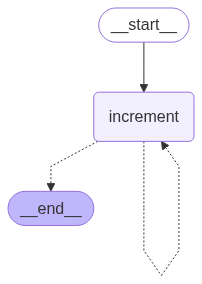

In [11]:
from langgraph.graph import StateGraph, END
from typing import TypedDict, List, Annotated
from langgraph.pregel.io import AddableValuesDict
import operator

class AnnotatedState(TypedDict):
    
    count: int
    sum: Annotated[int, operator.add] 
    count_history: Annotated[List[int], operator.concat]
    # Annotated Keep tracks the existing value and 
    # add it with a newly returned value from the node.
    # operator.add(a: would be previous value, b: currently computed value returned by the particular node)
    # The final result would update the actual key.

INCREMENT = "increment"

def increment_node(state: AnnotatedState) -> AnnotatedState : # Returns the same AnnotatedState object but with updated values.
    
    print(f"Current state's count {state["count"]}", end = "\n")
    print(f"Current state's sum {state["sum"]}", end = "\n")
    print(f"Current count_history {state["count_history"]}", end = "\n")
    # Get the current state's count attribute and increment with one value. It automatically updates the value.
    
    new_count: int = state["count"] + 1
    return {
        "count": new_count,
        "sum": new_count,
        "count_history": [new_count]
    } 

def should_continue(state: AnnotatedState) -> str:
    if state["count"] > 4:
        return END
    return INCREMENT

# Create a state graph.
graph_builder = StateGraph(AnnotatedState)
graph_builder.add_node(INCREMENT, increment_node)
graph_builder.set_entry_point(INCREMENT)

# Conditional Edge.
graph_builder.add_conditional_edges(
    INCREMENT,
    should_continue,
    path_map = {
        INCREMENT: INCREMENT,
        END: END
    } 
)

graph = graph_builder.compile()
graph

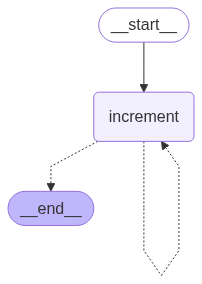

In [18]:
# With a proper documentation.
# ✅ Imports
from langgraph.graph import StateGraph, END
from typing import TypedDict, List, Annotated
from langgraph.pregel.io import AddableValuesDict
import operator

# ✅ Define the state structure for the LangGraph using TypedDict
class AnnotatedState(TypedDict):
    """
    Defines the structure of the state shared across LangGraph nodes.

    Fields:
    --------
    count : int
        A simple counter to control how many times the loop runs.

    sum : Annotated[int, operator.add]
        An accumulated sum of `count` values. Uses `operator.add` to add the previous value with
        the new one returned from the current node.

    count_history : Annotated[List[int], operator.concat]
        A list of all `count` values over iterations. Uses `operator.concat` to append new values.
    """
    count: int
    sum: Annotated[int, operator.add]
    count_history: Annotated[List[int], operator.concat]


# ✅ Node that will be executed in the graph
def increment_node(state: AnnotatedState) -> AnnotatedState:
    """
    Node logic: Increments the count and returns updated values for `sum` and `count_history`.

    LangGraph will automatically combine the returned values using the `Annotated` operator:
    - `sum`: Uses `operator.add` → adds to previous sum.
    - `count_history`: Uses `operator.concat` → appends to the history list.

    Parameters:
    -----------
    state : AnnotatedState
        The current state of the graph.

    Returns:
    --------
    AnnotatedState
        A partial update that will be combined with the original state.
    """
    print(f"Current state's count: {state['count']}")
    print(f"Current state's sum: {state['sum']}")
    print(f"Current count_history: {state['count_history']}")

    new_count: int = state["count"] + 1

    return {
        "count": new_count,              # Will overwrite
        "sum": new_count,                # Will be added to previous sum
        "count_history": [new_count]     # Will be concatenated with previous list
    }


# ✅ Conditional function to stop or continue the loop
def should_continue(state: AnnotatedState) -> str:
    """
    Routing logic to decide if the graph should continue or end.

    If count > 4, the graph ends; otherwise, continue incrementing.

    Parameters:
    -----------
    state : AnnotatedState

    Returns:
    --------
    str
        "increment" (next node) or END (stop graph)
    """
    return END if state["count"] > 4 else INCREMENT


# ✅ Build the state graph
graph_builder = StateGraph(AnnotatedState)

# Add the incrementing node
graph_builder.add_node(INCREMENT, increment_node)

# Set the first node to run
graph_builder.set_entry_point(INCREMENT)

# Add routing based on the current state
graph_builder.add_conditional_edges(
    INCREMENT,
    should_continue,
    path_map={
        INCREMENT: INCREMENT,  # Go back to increment node
        END: END               # Stop execution
    }
)

# ✅ Compile the final LangGraph
graph = graph_builder.compile()
graph


In [21]:
result: AddableValuesDict = graph.invoke(
    AnnotatedState(
        count = 0,
        sum = 0,
        count_history = []
    )
)

Current state's count: 0
Current state's sum: 0
Current count_history: []
Current state's count: 1
Current state's sum: 1
Current count_history: [1]
Current state's count: 2
Current state's sum: 3
Current count_history: [1, 2]
Current state's count: 3
Current state's sum: 6
Current count_history: [1, 2, 3]
Current state's count: 4
Current state's sum: 10
Current count_history: [1, 2, 3, 4]


In [15]:
result

{'count': 5, 'sum': 15, 'count_history': [1, 2, 3, 4, 5]}